First we get the dataset in order by computing the ANOVA results and taking some of the best and worst features:

In [1]:
import pandas as pd
import scipy.stats as stats
from ass4.anova import compute_anovas
import matplotlib.pyplot as plt

df = pd.read_csv('../data/labeled_data.csv', index_col=False, header=None)
anova_results = compute_anovas()

features_good = [result[0] for result in anova_results[:3]]
features_bad = [result[0] for result in anova_results[-3:]]
cols = df.columns

print(features_good)
print(features_bad)

# Generate two groups for all selected features
df_good_1 = df[features_good][df[cols[-1]] == 1]
df_good_2 = df[features_good][df[cols[-1]] == 2]
df_bad_1 = df[features_bad][df[cols[-1]] == 1]
df_bad_2 = df[features_bad][df[cols[-1]] == 2]

[133, 10, 132]
[109, 72, 15]


Next, we plot the features:

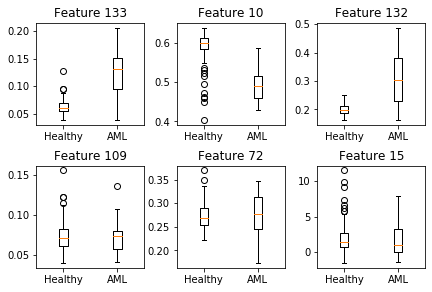

In [2]:
fig, axs = plt.subplots(2, 3)
# Good features
for i in range(len(features_good)):
    feature = features_good[i]
    axs[0, i].boxplot([df_good_1[feature], df_good_2[feature]])
    axs[0, i].set_title('Feature ' + str(feature))
    axs[0, i].set_xticklabels(["Healthy", "AML"])
    
# Bad features
for i in range(len(features_bad)):
    feature = features_bad[i]
    axs[1, i].boxplot([df_bad_1[feature], df_bad_2[feature]])
    axs[1, i].set_title('Feature ' + str(feature))
    axs[1, i].set_xticklabels(["Healthy", "AML"])

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9, hspace=0.4, wspace=0.3)
plt.savefig('../images/feature_boxplots.png')

As can be seen in the above figure, the top row (containing the better features) show a larger difference between the 
groups than the worse features of the lower row. 